In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.semi_supervised import SelfTrainingClassifier, LabelPropagation
import pickle

---

In [2]:
data = pd.read_csv('data/qualidade_leite.csv')
data

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
0,6.6,35,1,0,1,0,254,alta
1,6.6,36,0,1,0,1,253,alta
2,8.5,70,1,1,1,1,246,NaN
3,9.5,34,1,1,0,1,255,NaN
4,6.6,37,0,0,0,0,255,média
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,NaN
1055,6.7,38,1,0,1,0,255,NaN
1056,3.0,40,1,1,1,1,255,NaN
1057,6.8,43,1,0,1,0,250,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperatura  1059 non-null   int64  
 2   Sabor        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Gordura      1059 non-null   int64  
 5   Turbidez     1059 non-null   int64  
 6   Cor          1059 non-null   int64  
 7   Qualidade    424 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [4]:
data.describe()

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


---

In [5]:
data['Qualidade'].value_counts(dropna=False)

Qualidade
NaN      635
baixa    184
média    149
alta      91
Name: count, dtype: int64

In [6]:
labeled_df = data.dropna(subset='Qualidade').copy()
unlabeled_df = data[data['Qualidade'].isna()].copy()

In [7]:
labeled_df

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
0,6.6,35,1,0,1,0,254,alta
1,6.6,36,0,1,0,1,253,alta
4,6.6,37,0,0,0,0,255,média
6,5.5,45,1,0,1,1,250,baixa
7,4.5,60,0,1,1,1,250,baixa
...,...,...,...,...,...,...,...,...
1047,6.8,45,1,1,1,0,245,alta
1048,9.5,34,1,1,0,1,255,baixa
1049,6.5,37,0,0,0,0,255,média
1052,6.5,40,1,0,0,0,250,média


In [8]:
unlabeled_df

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
2,8.5,70,1,1,1,1,246,NaN
3,9.5,34,1,1,0,1,255,NaN
5,6.6,37,1,1,1,1,255,NaN
8,8.1,66,1,0,1,1,255,NaN
10,6.7,45,1,1,1,0,245,NaN
...,...,...,...,...,...,...,...,...
1053,8.1,66,1,0,1,1,255,NaN
1054,6.7,45,1,1,0,0,247,NaN
1055,6.7,38,1,0,1,0,255,NaN
1056,3.0,40,1,1,1,1,255,NaN


In [9]:
X = labeled_df.drop(columns='Qualidade')
y = labeled_df['Qualidade']

---

In [10]:
le = LabelEncoder()
y = le.fit_transform(y)
le.inverse_transform([0, 1, 2])

array(['alta', 'baixa', 'média'], dtype=object)

In [11]:
scaler = MinMaxScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_norm

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.553846,0.017857,1.0,0.0,1.0,0.0,0.933333
1,0.553846,0.035714,0.0,1.0,0.0,1.0,0.866667
2,0.553846,0.053571,0.0,0.0,0.0,0.0,1.000000
3,0.384615,0.196429,1.0,0.0,1.0,1.0,0.666667
4,0.230769,0.464286,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
419,0.584615,0.196429,1.0,1.0,1.0,0.0,0.333333
420,1.000000,0.000000,1.0,1.0,0.0,1.0,1.000000
421,0.538462,0.053571,0.0,0.0,0.0,0.0,1.000000
422,0.538462,0.107143,1.0,0.0,0.0,0.0,0.666667


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, random_state=10)

---

In [13]:
svm = SVC(kernel='linear', random_state=10)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=10)

In [14]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106



---

In [15]:
unlabeled_df.drop(columns='Qualidade', inplace=True)
unlabeled_df.head()

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
5,6.6,37,1,1,1,1,255
8,8.1,66,1,0,1,1,255
10,6.7,45,1,1,1,0,245


In [16]:
unlabeled_df_norm = pd.DataFrame(scaler.transform(unlabeled_df), columns=unlabeled_df.columns)
unlabeled_df_norm.head()

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.846154,0.642857,1.0,1.0,1.0,1.0,0.400000
1,1.000000,0.000000,1.0,1.0,0.0,1.0,1.000000
2,0.553846,0.053571,1.0,1.0,1.0,1.0,1.000000
3,0.784615,0.571429,1.0,0.0,1.0,1.0,1.000000
4,0.569231,0.196429,1.0,1.0,1.0,0.0,0.333333


In [17]:
unlabeled_y_pred = svm.predict(unlabeled_df_norm)
unlabeled_y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1,
       2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0,

In [18]:
new_X_train = pd.concat([X_train, unlabeled_df_norm], ignore_index=True)
new_X_train

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.584615,0.017857,1.0,0.0,1.0,0.0,0.400000
1,0.538462,0.035714,0.0,0.0,0.0,0.0,0.466667
2,0.538462,0.017857,1.0,0.0,1.0,0.0,0.400000
3,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
4,0.553846,0.196429,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
948,0.784615,0.571429,1.0,0.0,1.0,1.0,1.000000
949,0.569231,0.196429,1.0,1.0,0.0,0.0,0.466667
950,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
951,0.000000,0.107143,1.0,1.0,1.0,1.0,1.000000


In [19]:
new_y_train = pd.concat([pd.Series(y_train), pd.Series(unlabeled_y_pred)], ignore_index=True)
new_y_train

0      2
1      2
2      2
3      0
4      0
      ..
948    1
949    1
950    0
951    1
952    2
Length: 953, dtype: int64

In [20]:
pseudo_labeling = SVC(kernel='linear', random_state=10)
pseudo_labeling.fit(new_X_train, new_y_train)
pseudo_y_pred = pseudo_labeling.predict(X_test)
print(classification_report(y_test, pseudo_y_pred))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50        23
           1       0.66      0.87      0.75        46
           2       0.88      0.76      0.81        37

    accuracy                           0.73       106
   macro avg       0.74      0.67      0.69       106
weighted avg       0.74      0.73      0.72       106



In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106



---

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, random_state=10)

In [24]:
svm = SVC(kernel='linear', probability=True, random_state=10)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=10)

In [25]:
probabilities = svm.predict_proba(unlabeled_df_norm)
y_pred = svm.predict(unlabeled_df_norm)

In [26]:
results_table = pd.DataFrame(probabilities, columns=['Pro C0', 'Prob C1', 'Prob C2'])
results_table['Previsão'] = y_pred
results_table['Probabilidade máxima'] = results_table[['Pro C0', 'Prob C1', 'Prob C2']].max(axis=1)
results_table

,Pro C0,Prob C1,Prob C2,Previsão,Probabilidade máxima
0,0.147210,0.852259,0.000531,1,0.852259
1,0.249874,0.715117,0.035009,1,0.715117
2,0.491701,0.506534,0.001764,1,0.506534
3,0.076294,0.922552,0.001155,1,0.922552
4,0.693914,0.215723,0.090363,0,0.693914
...,...,...,...,...,...
630,0.076294,0.922552,0.001155,1,0.922552
631,0.130915,0.459888,0.409197,1,0.459888
632,0.540366,0.195320,0.264314,0,0.540366
633,0.255691,0.743873,0.000436,1,0.743873


<Axes: ylabel='Frequency'>

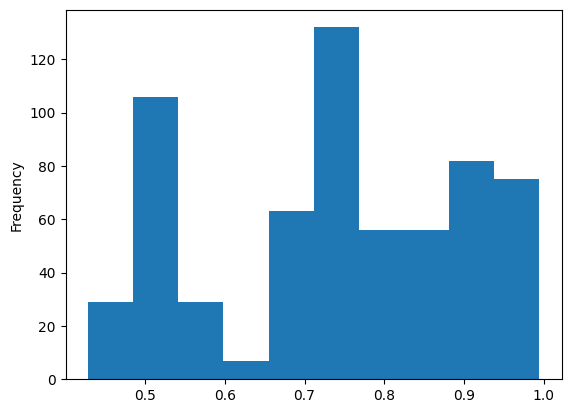

In [27]:
results_table['Probabilidade máxima'].plot(kind='hist')

In [44]:
results_table['Probabilidade máxima'] >= 0.75

0       True
1      False
2      False
3       True
4      False
       ...  
630     True
631    False
632    False
633    False
634    False
Name: Probabilidade máxima, Length: 635, dtype: bool

In [45]:
filtro = results_table['Probabilidade máxima'] >= 0.75
novo_X_train = pd.concat([X_train, unlabeled_df_norm[filtro]])
novo_y_train = pd.concat([pd.Series(y_train), results_table.loc[filtro, 'Previsão']])

In [46]:
svm = SVC(kernel='linear', probability=True, random_state=10)
svm.fit(novo_X_train, novo_y_train)

SVC(kernel='linear', probability=True, random_state=10)

In [47]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.72      0.91      0.81        46
           2       0.92      0.89      0.90        37

    accuracy                           0.79       106
   macro avg       0.80      0.73      0.74       106
weighted avg       0.80      0.79      0.78       106



---

In [49]:
pd.Series([-1] * unlabeled_df_norm.shape[0])

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
630   -1
631   -1
632   -1
633   -1
634   -1
Length: 635, dtype: int64

In [51]:
X_train_self_training = pd.concat([X_train, unlabeled_df_norm], ignore_index=True)
y_train_self_training = pd.concat([pd.Series(y_train), pd.Series([-1] * unlabeled_df_norm.shape[0])], ignore_index=True)

In [52]:
X_train_self_training

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.584615,0.017857,1.0,0.0,1.0,0.0,0.400000
1,0.538462,0.035714,0.0,0.0,0.0,0.0,0.466667
2,0.538462,0.017857,1.0,0.0,1.0,0.0,0.400000
3,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
4,0.553846,0.196429,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
948,0.784615,0.571429,1.0,0.0,1.0,1.0,1.000000
949,0.569231,0.196429,1.0,1.0,0.0,0.0,0.466667
950,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
951,0.000000,0.107143,1.0,1.0,1.0,1.0,1.000000


In [54]:
y_train_self_training

0      2
1      2
2      2
3      0
4      0
      ..
948   -1
949   -1
950   -1
951   -1
952   -1
Length: 953, dtype: int64

In [55]:
svm = SVC(kernel='linear', probability=True, random_state=10)
self_training = SelfTrainingClassifier(svm, threshold=0.8, max_iter=15, verbose=True)

In [56]:
self_training.fit(X_train_self_training, y_train_self_training)

End of iteration 1, added 244 new labels.
End of iteration 2, added 105 new labels.
End of iteration 3, added 50 new labels.
End of iteration 4, added 3 new labels.
End of iteration 5, added 14 new labels.


SelfTrainingClassifier(base_estimator=SVC(kernel='linear', probability=True,
                                          random_state=10),
                       max_iter=15, threshold=0.8, verbose=True)

In [57]:
y_pred = self_training.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.81      0.91      0.86        46
           2       0.92      0.89      0.90        37

    accuracy                           0.85       106
   macro avg       0.85      0.82      0.83       106
weighted avg       0.85      0.85      0.85       106



---

In [59]:
label_propagation = LabelPropagation()

In [60]:
label_propagation.fit(X_train_self_training, y_train_self_training)

LabelPropagation()

In [61]:
y_pred = label_propagation.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.89      0.94        46
           2       0.88      0.95      0.91        37

    accuracy                           0.93       106
   macro avg       0.93      0.95      0.94       106
weighted avg       0.94      0.93      0.93       106



In [71]:
with open('min_max_scaler.pkl', 'wb') as arquivo:
    pickle.dump(scaler, arquivo)

In [72]:
with open('label_propagation.pkl', 'wb') as arquivo:
    pickle.dump(label_propagation, arquivo)

In [66]:
modelo_min_max = pd.read_pickle('min_max_scaler.pkl')
model_label_propagation = pd.read_pickle('label_propagation.pkl')

In [67]:
novo_dado = {
    'pH':[6.4],
    'Temperatura':[52],
    'Sabor':[0],
    'Odor':[1],
    'Gordura':[1],
    'Turbidez':[0],
    'Cor':[253]
}

In [69]:
novo_dado = modelo_min_max.transform(pd.DataFrame(novo_dado))
model_label_propagation.predict(novo_dado)

c:\Users\mhenr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LabelPropagation was fitted with feature names
  warnings.warn(


array([0])

In [70]:
le.inverse_transform([0])

array(['alta'], dtype=object)